In [83]:
from pathlib import Path
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

def get_nps(trials_dir):
    dind_trials = [str_ for str_ in os.listdir(trials_dir) if str_[:5]=="trial"]
    dind_trials = sorted(dind_trials, key=lambda x: int(x.split('_')[-1]))
    dind_dfs = [pd.read_csv(trials_dir/dind_trial/"fitness.csv") for dind_trial in dind_trials]
    dind_nps = [df["team_fitness_aggregated"].to_numpy() for df in dind_dfs]
    return dind_nps

def get_stats(nps):
    # First index is the trial number. Axis 0
    # Second index is the fitness at the generation. Axis 1

    # Truncate based on shortest trial
    smallest_dim = np.inf
    for n in nps:
        if n.shape[0] < smallest_dim:
            smallest_dim = n.shape[0]

    for i in range(len(nps)):
        nps[i] = nps[i][:smallest_dim]


    arr = np.array(nps)

    avg = np.average(arr, axis=0)
    dev = np.std(arr, axis=0)
    err = dev/np.sqrt(arr.shape[0])
    return avg, dev, err

def plot_stats(avg, err, color, ax):
    if ax is None:
        h1, = plt.plot(avg, color=color)
        h2 = plt.fill_between(np.arange(avg.shape[0]), avg+err, avg-err, alpha=0.1, color=color)
    else:
        h1, = ax.plot(avg, color=color)
        h2 = ax.fill_between(np.arange(avg.shape[0]), avg+err, avg-err, alpha=0.1, color=color)
    return h1, h2

def process_trials(trials_dir, color, ax):
    nps = get_nps(trials_dir)
    avg, dev, err = get_stats(nps)
    return plot_stats(avg, err, color, ax)

def process_experiment(root_dir):
    fig, ax = plt.subplots(1,1)
    dindirect_dir = root_dir/"D-Indirect"
    g_dir = root_dir/"G"
    d_dir = root_dir/"D"
    h1g, h2g = process_trials(dindirect_dir, color='green', ax=ax)
    h1b, h2b = process_trials(g_dir, color='blue', ax=ax)
    h1o, h2o = process_trials(d_dir, color='orange', ax=ax)
    ax.legend([h1g, h1b, h1o], ["New D-Indirect", "G", "D"], loc="lower left")
    title = ".".join(str(root_dir).split("/")[5:])
    ax.set_title(title)
    ax.set_xlabel("Generations")
    ax.set_ylabel("Performance on G")
    ax.set_ylim([0,15])
    ax.set_xlim([0,1000])
    fig.savefig(title+".png")

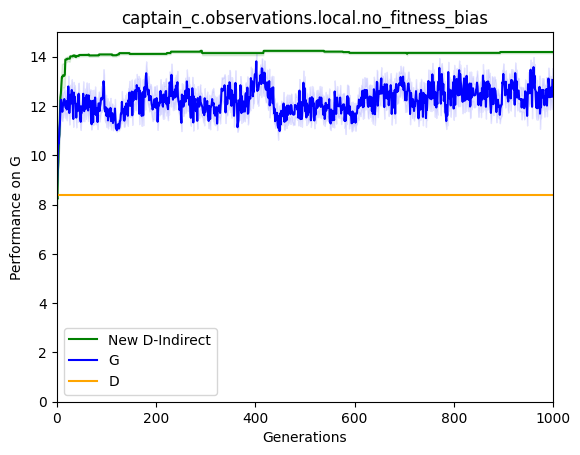

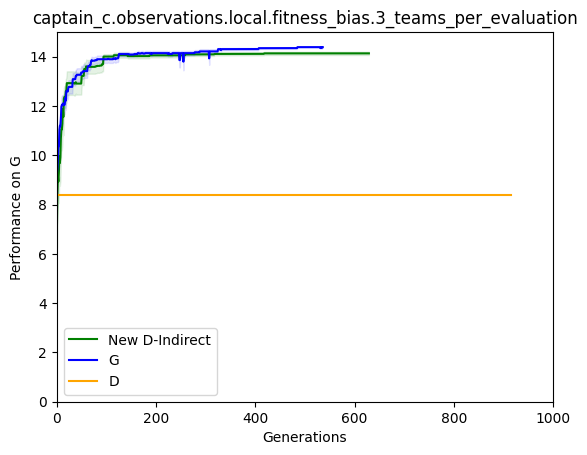

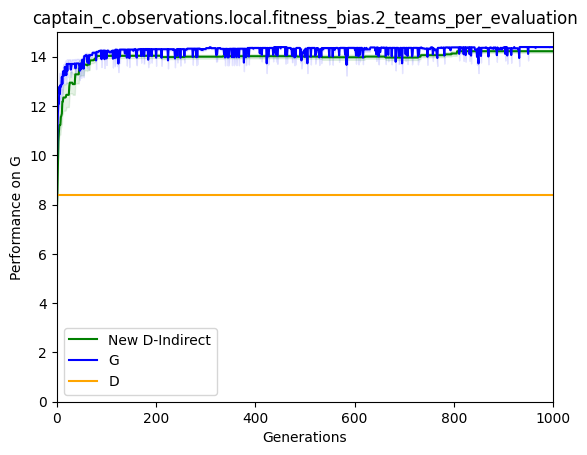

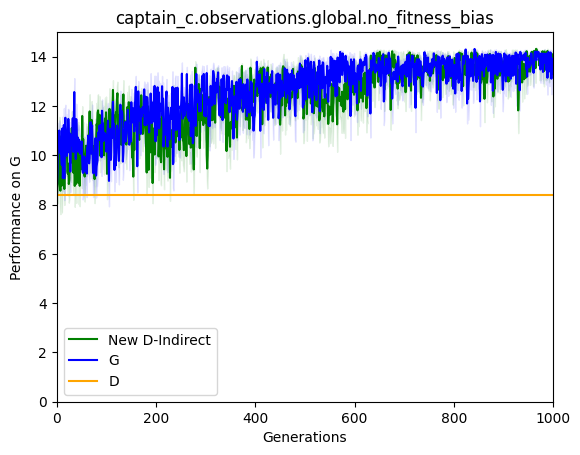

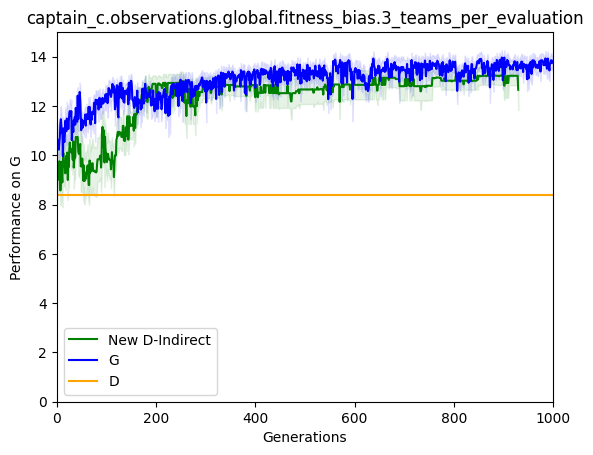

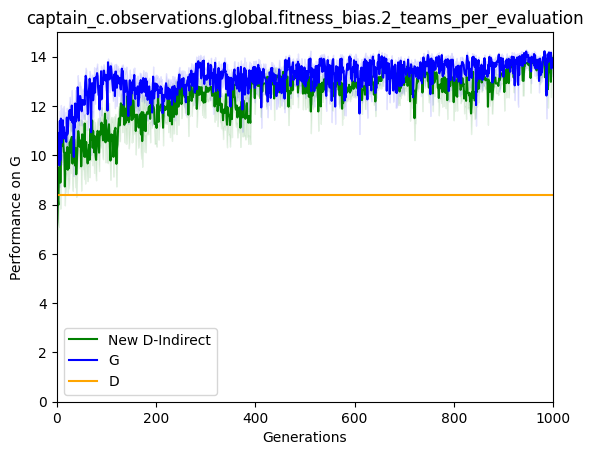

In [84]:
top_dir = "~/Desktop/sep_10_hpc/captain_c/observations"
experiment_dirs = []
for dirpath, sub, filenames in os.walk(os.path.expanduser(top_dir)):
    if "G" in sub:
        experiment_dirs.append(Path(dirpath))


for d in experiment_dirs:
    process_experiment(d)

# root_dir = Path(os.path.expanduser("~/Desktop/sep_10_hpc/captain_c/observations/local/fitness_bias/3_teams_per_evaluation"))
# process_experiment(root_dir)
# process_experiment(Path(os.path.expanduser("~/Desktop/sep_10_hpc/captain_c/observations/local/fitness_bias/2_teams_per_evaluation")))

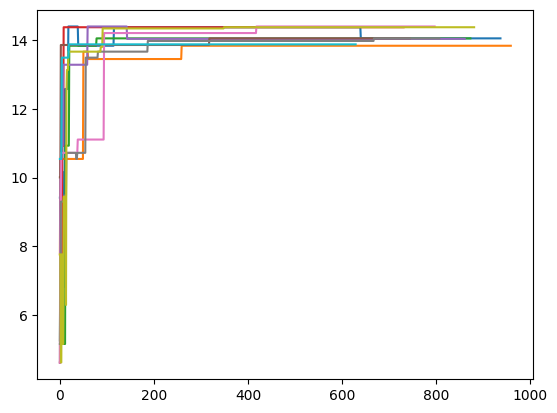

In [18]:
dn = get_nps(root_dir/"D-Indirect")
for d in dn:
    plt.plot(d)

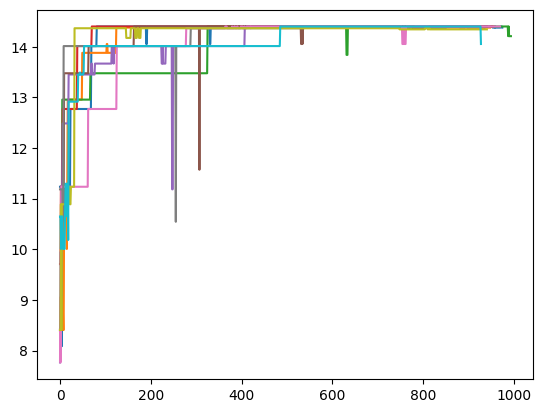

In [19]:
gn = get_nps(root_dir/"G")
for g in gn:
    plt.plot(g)

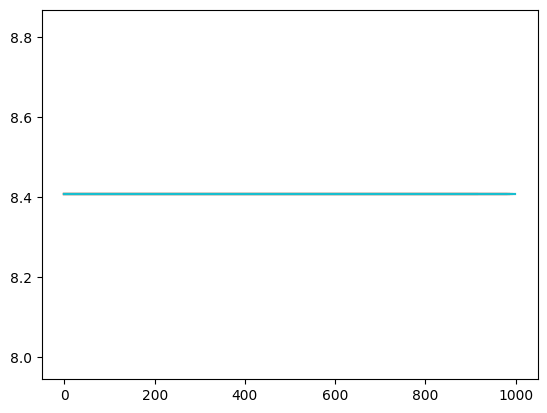

In [21]:
ddn = get_nps(root_dir/"D")
for dd in ddn:
    plt.plot(dd)

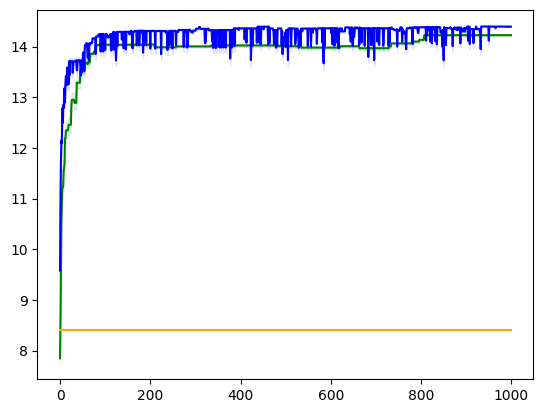

In [16]:
root_dir = Path(os.path.expanduser("~/Desktop/sep_10_hpc/captain_c/observations/local/fitness_bias/2_teams_per_evaluation"))
process_experiment(root_dir)